# **Problum statment**
# CORONA VIROUS Prediction.

-- The Dtaset is about CORONA VIROUS TESTED individual.

-- This dataset provides a comprehensive collection of people's Gender and their Symptoms.

-- In addition to basic information it includes Ind_ID	,Test_date , Age_60_above	,	Known_contact.

-- This dataset have 11 columns and 278848 rows.

**Column Heads:**
1. Ind_ID
2. Test_date
3. Cough_symptoms
4. Fever
5. Sore_throat
6. Shortness_of_breath
7. Headache
8. Corona
9. Age_60_above
10. Sex
11. Known_contact

-- **Ind_ID:** Individual ID.

-- **Test_date:** Date when tested for COVID.

-- **Cough_symptoms:** Is individual have Cough or not.

-- **Fever**: Is individual have Fever or not.

-- **Sore_throat:** Is individual have Sore_throat or not.

-- **Shortness_of_breath:** Is individual have Shortness_of_breath or not.

-- **Headache:** Is individual have Headache or not.

-- **Corona:** Is individual infected or not.

-- **Age_60_above:** Is individual above 60 years old or not.

-- **Sex:** Gender of Individual.

-- **Known_contact:** Known contact with the individual confirmed to have COVID-19.

* **TARGET VARIABLE in this Dtaset is "Corona"**.

**Goals**:

* Predicting a disease accurately can improve medical treatment.
* Effective screening and reducing health care burden.

* **Early Detection and Isolation**: The dataset aims to help build models that can predict the likelihood of an individual having COVID-19 based on their symptoms and demographic information. By enabling early detection, it would help facilitate timely isolation of infected individuals, which could minimize the virus spread.

* **Efficient Resource Allocation**: Accurately identifying high-risk individuals could assist healthcare providers and authorities in optimizing resource allocation. This includes prioritizing testing, hospital beds, and medical supplies for those who are most likely to need them.

* **Risk Assessment and Public Health Strategies**: By understanding the factors contributing to infection, public health authorities can make informed decisions about implementing preventive measures. Such measures might include targeted testing campaigns, social distancing guidelines, and vaccination strategies.

* **Personalized Treatment**: Predicting disease severity could help tailor treatment plans to individual needs. This could enhance medical outcomes and prevent complications.

* **Reduce Healthcare Burden**: Early detection of COVID-19 cases could help reduce the burden on healthcare systems by enabling timely medical intervention. This would prevent overwhelmed hospitals and allow healthcare professionals to provide better care to all patients.


-- In addition to these broad goals, the dataset can be used for research purposes to further understand the disease dynamics, identify potential risk factors, and develop more effective preventive and treatment strategies.

----

# Libraries

In [1]:
import pandas as pd
import numpy as np

#Ploating
import matplotlib.pyplot as plt
import seaborn as sns

#Emcoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

# x-y split
from sklearn.model_selection import train_test_split

#Scaling
from sklearn.preprocessing import StandardScaler

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold

#MSE AND MAE
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

#
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from tabulate import tabulate
import warnings

# Loading Dataset

In [2]:
df=pd.read_csv('/kaggle/input/corona-tested-sample/corona_tested_006 (2).csv')
df

/tmp/ipykernel_17/3081868710.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/corona-tested-sample/corona_tested_006 (2).csv')


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


# Understanding the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [4]:
df.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

* Column **Ind_ID** heav	**0** nullvalues..And the data type is **int**.
* Column **Test_date**	heav	**0** nullvalues..And the data type is **object**.
* Column **Cough_symptoms**	heav	**252** nullvalues..And the data type is **object**.
* Column **Fever**	heav	**252** nullvalues..And the data type is **object**.
* Column **Sore_throat**	heav	**1** nullvalues..And the data type is **object**.
* Column **Shortness_of_breath**	heav	**1** nullvalues..And the data type is **object**.
* Column **Headache**	heav	**1** nullvalues..And the data type is **object**.
* Column **Corona**	heav	**0** nullvalues..And the data type is **object**.
* Column **Age_60_above**	heav	**127320** nullvalues..And the data type is **object**.
* Column **Sex**	heav	**19563** nullvalues..And the data type is **object**.
* Column **Known_contact**	heav	**0** nullvalues..And the data type is **object**.

In [5]:
print(df.shape)

(278848, 11)


This dataset have 11 columns and 278848 rows.

In [6]:
# Checking total number of duplicates
df.duplicated().sum()

0

There is no Duplicated rows in the Dataset

# Data Cleaning

In [7]:
# Coping df into df1
df1=df.copy()

Dropping

In [8]:
# Dropping column Ind_ID
df1=df1.drop('Ind_ID',axis=1)

In [9]:
# Dropping column Test_date
df1=df1.drop('Test_date',axis=1)

In [10]:
# Dropping column Age_60_above
df1=df1.drop('Age_60_above',axis=1)

In [11]:
# Dropping column 'Known_contact
df1=df1.drop('Known_contact',axis=1)

In [12]:
df1

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
0,True,False,True,False,False,negative,NaN
1,False,True,False,False,False,positive,NaN
2,False,True,False,False,False,positive,NaN
3,True,False,False,False,False,negative,NaN
4,True,False,False,False,False,negative,NaN
...,...,...,...,...,...,...,...
278843,False,False,False,False,False,positive,male
278844,False,False,False,False,False,negative,female
278845,False,False,False,False,False,negative,male
278846,False,False,False,False,False,negative,male


Handling null values

In [13]:
df1.isnull().sum()

Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                     0
Sex                    19563
dtype: int64

In [14]:
# dropping null values
df1.dropna(inplace=True)

In [15]:
df1.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Sex                    0
dtype: int64

Now there is no null values in the dataset

Unique  values in each column

In [16]:
df1['Cough_symptoms'].unique()

array([True, False], dtype=object)

In [17]:
df1['Fever'].unique()

array([False, True], dtype=object)

In [18]:
df1['Sore_throat'].unique()

array([False, True], dtype=object)

In [19]:
df1['Shortness_of_breath'].unique()

array([False, True], dtype=object)

In [20]:
df1['Headache'].unique()

array([False, True], dtype=object)

In [21]:
df1['Sex'].unique()

array(['male', 'female'], dtype=object)

In [22]:
df1['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [23]:
# There a value 'other' in the column Corona

In [24]:
print((df1['Corona']=='other').sum())

3374


In [25]:
# Dropping rows where column "Corona" have value 'other'.
df1.drop(df1[df1['Corona']=='other'].index,inplace=True)

In [26]:
df1['Corona'].unique()

array(['negative', 'positive'], dtype=object)

# Data Visualization

In [27]:
df1.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
13727,True,False,False,False,False,negative,male
13728,True,False,False,False,False,negative,female
13730,True,True,False,False,False,positive,female
13734,False,False,False,False,False,negative,male
13735,False,False,False,False,False,negative,female


Corona

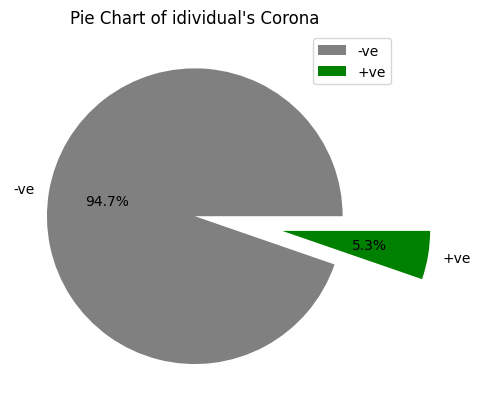

In [28]:
plt.pie(df1['Corona'].value_counts(),colors=['grey','g'],labels=['-ve','+ve'],explode=[0,0.6],autopct='%1.1f%%')
plt.title("Pie Chart of idividual's Corona")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

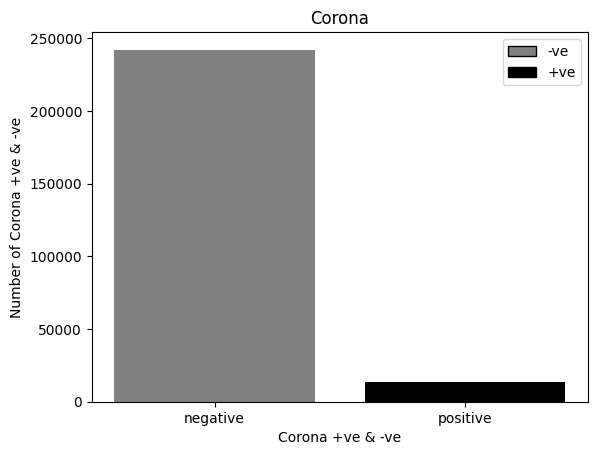

In [29]:
plt.bar(df1['Corona'].value_counts().index,df1['Corona'].value_counts().values,color=['grey','k'])
plt.xlabel('Corona +ve & -ve')
plt.ylabel('Number of Corona +ve & -ve')
plt.title('Corona')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['-ve','+ve']
plt.legend(handles, labels)

plt.show()

* In this Dataset 94.7% of idividuals are have corona -ve  & 5.3% are have corona +ve.

Cough_symptoms

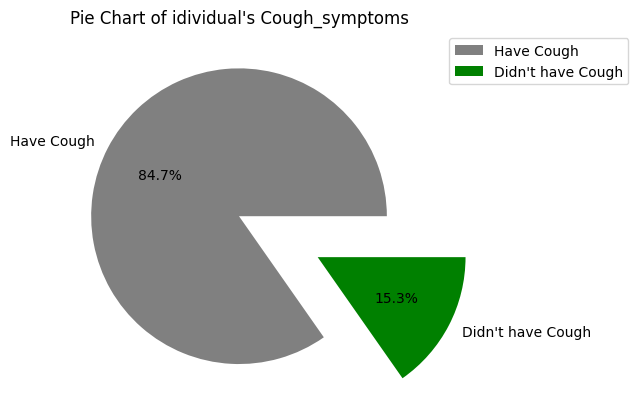

In [30]:
plt.pie(df1['Cough_symptoms'].value_counts(),colors=['grey','g'],labels=['Have Cough',"Didn't have Cough"],explode=[0,0.6],autopct='%1.1f%%')
plt.title("Pie Chart of idividual's Cough_symptoms")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

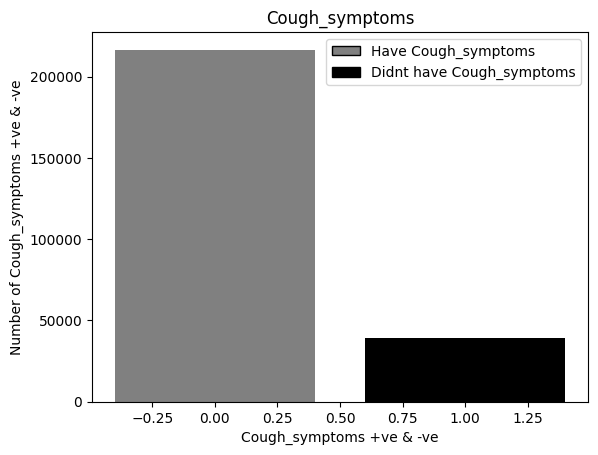

In [31]:
plt.bar(df1['Cough_symptoms'].value_counts().index,df1['Cough_symptoms'].value_counts().values,color=['grey','k'])
plt.xlabel('Cough_symptoms +ve & -ve')
plt.ylabel('Number of Cough_symptoms +ve & -ve')
plt.title('Cough_symptoms')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['Have Cough_symptoms','Didnt have Cough_symptoms']
plt.legend(handles, labels)

plt.show()

* In this Dataset 84.7% of idividuals are have Cough symptoms & 15.3% didn't have Cough symptoms.

Fever

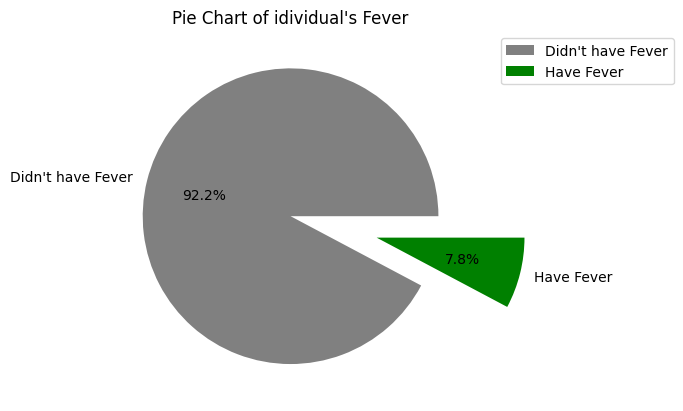

In [32]:
plt.pie(df1['Fever'].value_counts(),colors=['grey','g'],labels=["Didn't have Fever",'Have Fever'],explode=[0,0.6],autopct='%1.1f%%')
plt.title("Pie Chart of idividual's Fever")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

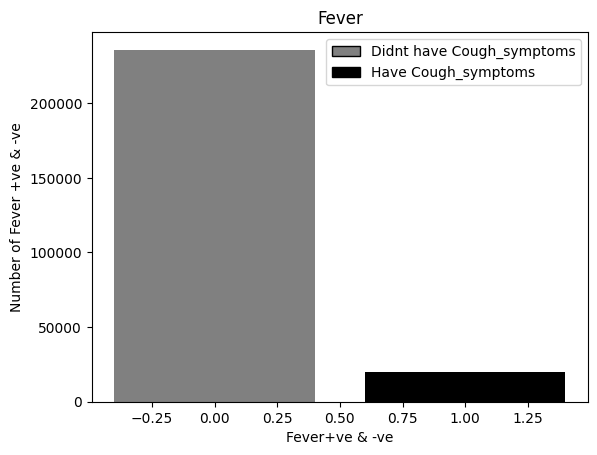

In [33]:
plt.bar(df1['Fever'].value_counts().index,df1['Fever'].value_counts().values,color=['grey','k'])
plt.xlabel('Fever+ve & -ve')
plt.ylabel('Number of Fever +ve & -ve')
plt.title('Fever')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['Didnt have Cough_symptoms','Have Cough_symptoms']
plt.legend(handles, labels)

plt.show()

* In this Dataset 7.8% of idividuals didn't have fever & 92.2%  have fever.

Sore_throat

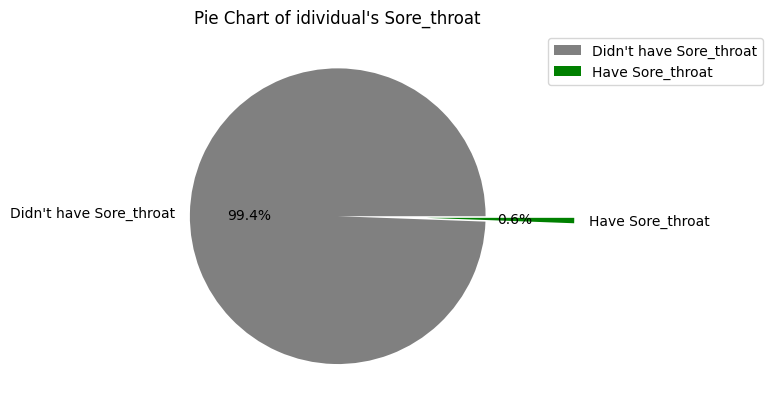

In [34]:
plt.pie(df1['Sore_throat'].value_counts(),colors=['grey','g'],labels=["Didn't have Sore_throat",'Have Sore_throat'],explode=[0,0.6],autopct='%1.1f%%')
plt.title("Pie Chart of idividual's Sore_throat")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

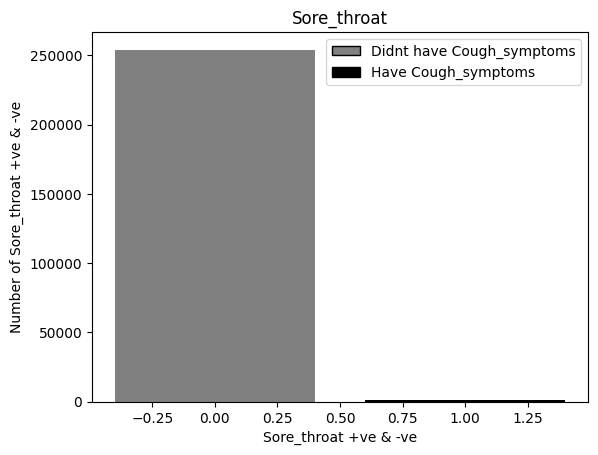

In [35]:
plt.bar(df1['Sore_throat'].value_counts().index,df1['Sore_throat'].value_counts().values,color=['grey','k'])
plt.xlabel('Sore_throat +ve & -ve')
plt.ylabel('Number of Sore_throat +ve & -ve')
plt.title('Sore_throat')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['Didnt have Cough_symptoms','Have Cough_symptoms']
plt.legend(handles, labels)

plt.show()

* In this Dataset 99.4% of idividuals didn't have Sore throat & 0.6% have Sore throat.

Shortness_of_breath

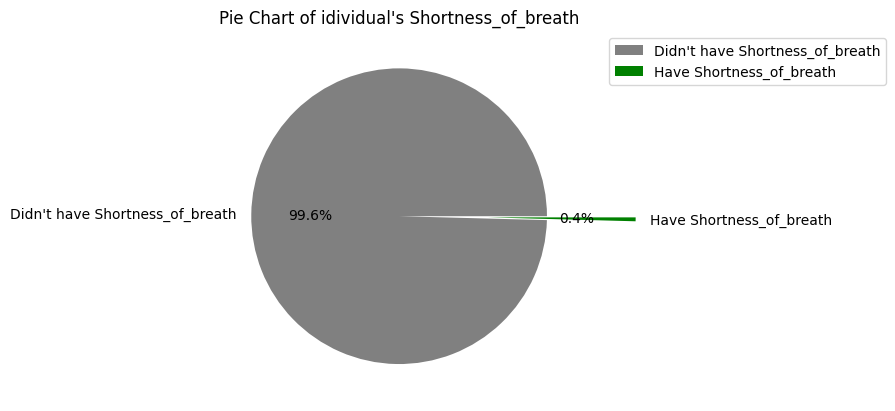

In [36]:
plt.pie(df1['Shortness_of_breath'].value_counts(),colors=['grey','g'],labels=["Didn't have Shortness_of_breath",'Have Shortness_of_breath'],explode=[0,0.6],autopct='%1.1f%%')
plt.title("Pie Chart of idividual's Shortness_of_breath")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

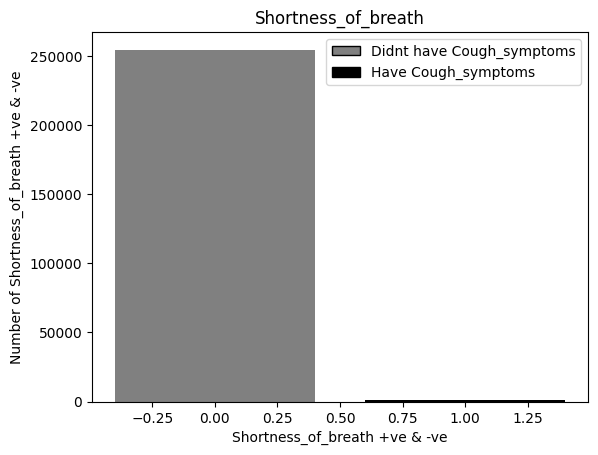

In [37]:
plt.bar(df1['Shortness_of_breath'].value_counts().index,df1['Shortness_of_breath'].value_counts().values,color=['grey','k'])
plt.xlabel('Shortness_of_breath +ve & -ve')
plt.ylabel('Number of Shortness_of_breath +ve & -ve')
plt.title('Shortness_of_breath')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['Didnt have Cough_symptoms','Have Cough_symptoms']
plt.legend(handles, labels)

plt.show()

* In this Dataset 99.6% of idividuals didn't have Shortness of breath & 0.4% have Shortness of breath.

Headache

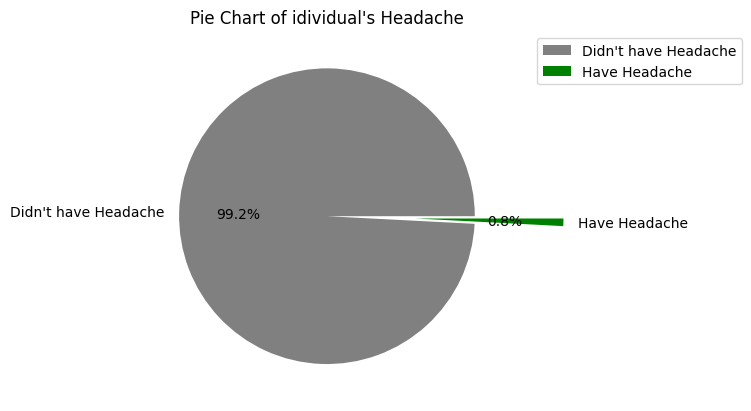

In [38]:
plt.pie(df1['Headache'].value_counts(),colors=['grey','g'],labels=["Didn't have Headache",'Have Headache'],explode=[0,0.6],autopct='%1.1f%%')
plt.title("Pie Chart of idividual's Headache")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

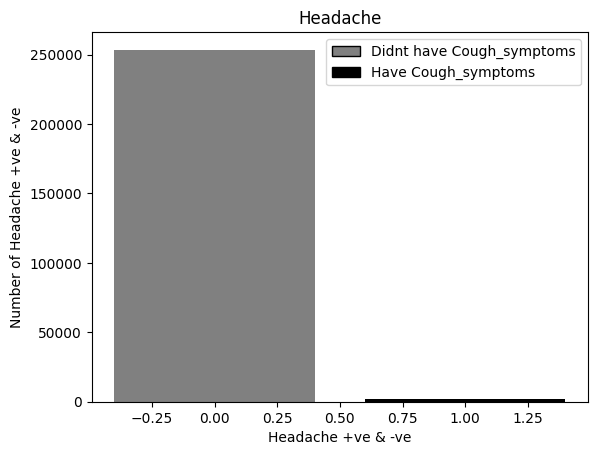

In [39]:
plt.bar(df1['Headache'].value_counts().index,df1['Headache'].value_counts().values,color=['grey','k'])
plt.xlabel('Headache +ve & -ve')
plt.ylabel('Number of Headache +ve & -ve')
plt.title('Headache')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['Didnt have Cough_symptoms','Have Cough_symptoms']
plt.legend(handles, labels)

plt.show()

* In this Dataset 99.2% of idividuals didn't have Headache & 0.8% have Headache.

Sex

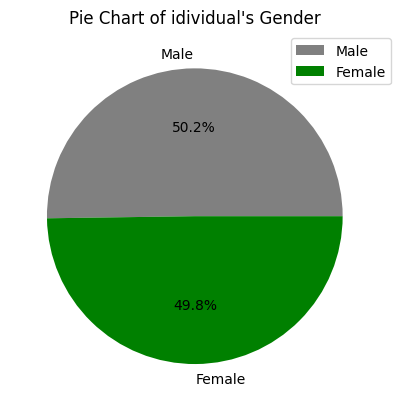

In [40]:
plt.pie(df1['Sex'].value_counts(),colors=['grey','g'],labels=["Male",'Female'],autopct='%1.1f%%')
plt.title("Pie Chart of idividual's Gender")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

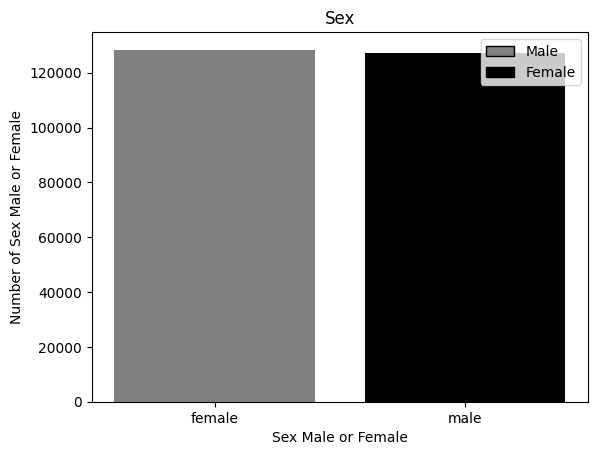

In [41]:
plt.bar(df1['Sex'].value_counts().index,df1['Sex'].value_counts().values,color=['grey','k'])
plt.xlabel('Sex Male or Female')
plt.ylabel('Number of Sex Male or Female')
plt.title('Sex')

handles = [plt.Rectangle((0,0),1,1, color=c,ec="k") for c in ['grey', 'k']]
labels= ['Male','Female']
plt.legend(handles, labels)

plt.show()

* In this Dataset 50.2% of idividuals are Male & 49.8% are Female.

# Encoding

**Changing datatype of each column**

Cough_symptoms

In [42]:
df1['Cough_symptoms']=df1['Cough_symptoms'].astype('int64')

Fever

In [43]:
df1['Fever']=df1['Fever'].astype('int64')

Sore_throat

In [44]:
df1['Sore_throat']=df1['Sore_throat'].astype('int64')

Shortness_of_breath

In [45]:
df1['Shortness_of_breath']=df1['Shortness_of_breath'].astype('int64')

Headache

In [46]:
df1['Headache']=df1['Headache'].astype('int64')

**Encode the column 'Corona' and 'Sex' with replace method.**

Corona

In [47]:
df1['Corona'].replace(['negative','positive'],[0,1],inplace=True)

/tmp/ipykernel_17/552523057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Corona'].replace(['negative','positive'],[0,1],inplace=True)
/tmp/ipykernel_17/552523057.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Corona'].replace(['negative','positive'],[0,1],inplace=True)


Sex

In [48]:
df1['Sex'].replace(['male','female'],[1,0],inplace=True)

/tmp/ipykernel_17/1706631603.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Sex'].replace(['male','female'],[1,0],inplace=True)
/tmp/ipykernel_17/1706631603.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Sex'].replace(['male','female'],[1,0],inplace=True)


In [49]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255668 entries, 13727 to 278847
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Cough_symptoms       255668 non-null  int64
 1   Fever                255668 non-null  int64
 2   Sore_throat          255668 non-null  int64
 3   Shortness_of_breath  255668 non-null  int64
 4   Headache             255668 non-null  int64
 5   Corona               255668 non-null  int64
 6   Sex                  255668 non-null  int64
dtypes: int64(7)
memory usage: 15.6 MB


In [50]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Cough_symptoms,255668.0,0.152745,0.359742,0.0,0.0,0.0,0.0,1.0
Fever,255668.0,0.077655,0.267629,0.0,0.0,0.0,0.0,1.0
Sore_throat,255668.0,0.005851,0.076270,0.0,0.0,0.0,0.0,1.0
Shortness_of_breath,255668.0,0.004216,0.064797,0.0,0.0,0.0,0.0,1.0
Headache,255668.0,0.008226,0.090321,0.0,0.0,0.0,0.0,1.0
Corona,255668.0,0.052928,0.223890,0.0,0.0,0.0,0.0,1.0
Sex,255668.0,0.497735,0.499996,0.0,0.0,0.0,1.0,1.0


# Correlation Analysis:

In [51]:
c=df1.corr()
c

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
Cough_symptoms,1.000000,0.451896,0.105560,0.097546,0.114091,0.194106,0.030953
Fever,0.451896,1.000000,0.118579,0.118703,0.164186,0.260399,0.035893
Sore_throat,0.105560,0.118579,1.000000,0.204739,0.339929,0.293147,-0.005909
Shortness_of_breath,0.097546,0.118703,0.204739,1.000000,0.222638,0.248565,0.004520
Headache,0.114091,0.164186,0.339929,0.222638,1.000000,0.366278,0.002188
Corona,0.194106,0.260399,0.293147,0.248565,0.366278,1.000000,0.026961
Sex,0.030953,0.035893,-0.005909,0.004520,0.002188,0.026961,1.000000


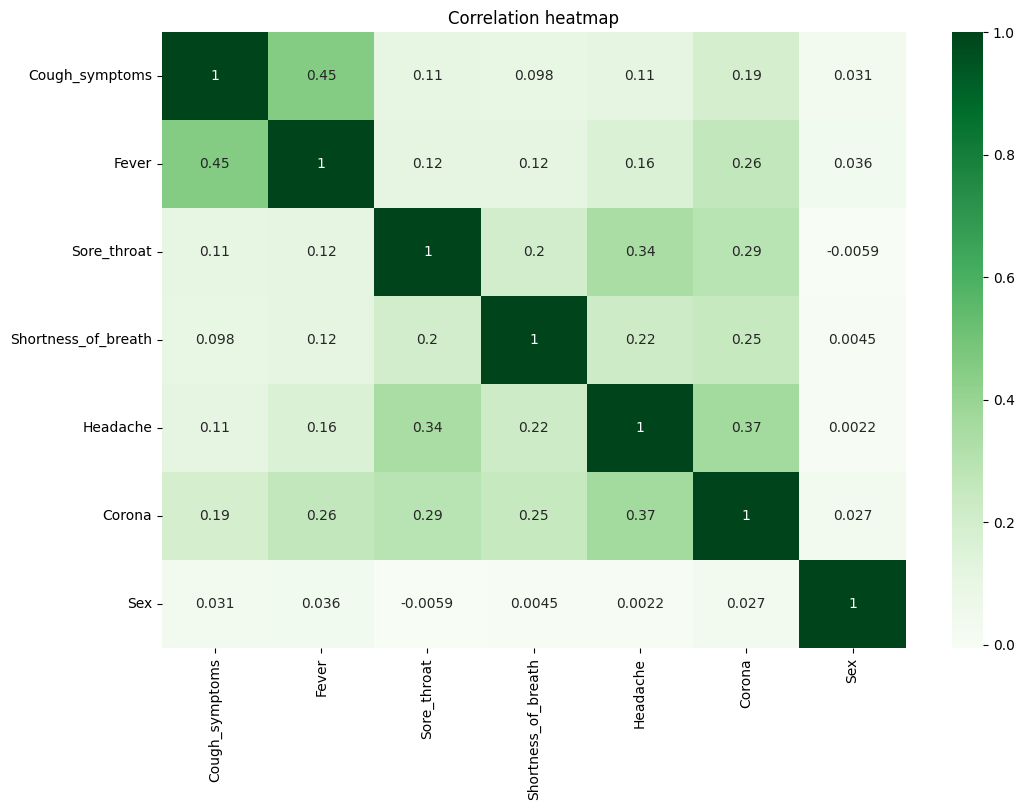

In [52]:
plt.figure(figsize=(12,8))
sns.heatmap(c,annot=True,cmap='Greens')
plt.title('Correlation heatmap')
plt.show()

In [53]:
s=df1.corr()['Corona']
s.sort_values(ascending=False)

Corona                 1.000000
Headache               0.366278
Sore_throat            0.293147
Fever                  0.260399
Shortness_of_breath    0.248565
Cough_symptoms         0.194106
Sex                    0.026961
Name: Corona, dtype: float64

# Feature Selection

In [54]:
# Spliting X and Y

In [55]:
x=df1.drop('Corona',axis=1)
y=df1['Corona']

# Data Splitting

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

# Model Generation

Logistic Classification

In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [58]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
y_pred=model.predict(x_test)

In [59]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9584620800250323


In [60]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 0.04153791997496773
Mean Squared Error: 0.04153791997496773
Root Mean Squared Error: 0.20380853754189918


# Prediction

In [61]:
x_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex
58050,0,0,0,0,0,1
200452,0,0,0,0,0,0
138962,1,0,0,0,0,1
136247,0,0,0,0,0,0
245022,0,0,0,0,0,1
...,...,...,...,...,...,...
53420,0,0,0,0,0,1
235966,0,0,0,0,0,0
150080,0,0,0,0,0,1
209912,0,0,0,0,0,1


In [62]:
y_test

58050     0
200452    0
138962    0
136247    0
245022    1
         ..
53420     1
235966    0
150080    0
209912    0
233017    0
Name: Corona, Length: 51134, dtype: int64

In [63]:
input_data=(0,	0,	0,	1,	0,	1)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(prediction)

[1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [64]:
input_data=(1,	1,	0,	0,	0,	0)

input_data_as_numpy_array=np.asarray(input_data)

input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

# std_data= scaler.transform(input_data_reshaped)

prediction=model.predict(input_data_reshaped)

print(prediction)

[0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# **Documentation and Reporting**

## CORONA VIROUS TESTED project report.

**1. Problem Statement:**

- This dataset provides a comprehensive collection of people's Gender and their Symptoms.The primary objective is to build a model that accurately predicts the Corona is +ve or -ve based on its features.

**2. Libraries:**
- import required Libraries.

**3. Data Understanding:**
- This dataset have 11 columns and 278848 rows.
- Features include: Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex and Known_contact

**4. Data Cleaning:**

- Droped the column Ind_ID,Test_date,Age_60_above,Sex and Known_contact.

- Missing values were found in 'Cough_symptoms  ','Fever','Sore_throat','Shortness_of_breath','Headache','Corona','Sex' columns.

- Missing values were handled by dropping rows where have null values.

- Dropped rows where column 'Corona' have the value 'other'.

**5. Data Visualization:**

- Histogram were created for entire dataset to understand their distribution.
- Pie chart created for all columns to understand their percent.
- Bar graph created for understanding how corona infection in each gender.

**6. Encoding:**

- Encode the column 'Corona' and 'Sex' with replace method.
- Changed dtype of columns 'Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache' from object into int.

**7. Correlation Analysis:**

- Correlation Analysis: a heatmap of the correlation matrix revealed the relationships between the variables.

**8.Feature Selection:**

- Target column stored in y variable.
Other features stored in x variable.

**9. Data Splitting:**
- Split x_train, x_test, y_train and y_test.

**10. Model Generation:**

-- Multiple Classification models were tested:-

* LogisticRegression()
* DecisionTreeClassifier()
* RandomForestClassifier()
* XGBClassifier()
* LGBMClassifier()
* CatBoostClassifier(verbose=0)
* SVC(probability=True)
* KNeighborsClassifier()
* GaussianNB()
* MLPClassifier()
* AdaBoostClassifier()
* ExtraTreesClassifier()

-- LogisticRegression has given the best result it give accuracy about 0.9584620800250323.And it was chosen as the final model.

- Mean Absolute Error: 0.04153791997496773
- Mean Squared Error: 0.04153791997496773
- Root Mean Squared Error: 0.20380853754189918

**11.Prediction:**
Predicted the model.

**THANK YOU**